In [ ]:
## Building Recomender Systems


In [55]:
## Creating a training pipeline
# Creating a pipeline; selecting top K features and calssify them Using Extriemely Random Forest

from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

# Generate data
X, y = samples_generator.make_classification(n_samples = 150, n_features = 25,n_classes = 3, n_informative = 6, n_redundant = 0, random_state = 7)

# Select top K features
k_best_selector = SelectKBest(f_regression, k = 9)

# Initialize Extremely Random Forests Calssifier
classifier = ExtraTreesClassifier(n_estimators = 60, max_depth = 4)

# Construc the pipeline
processor_pipeline = Pipeline([('selector', k_best_selector), ('erf', classifier)])

# Set the paprameters
processor_pipeline.set_params(selector__k = 7, erf__n_estimators = 30)

# Training the pipline
processor_pipeline.fit(X,y)

# Predict outputs for the input data
output = processor_pipeline.predict(X)
print("\n Predicted output:\n", output)

# Print scores
print("\n Scores:\n", processor_pipeline.score(X,y))

# Print the features chosen by the pipeline selector
status = processor_pipeline.named_steps['selector'].get_support()

# Show how inumerate works
print("#"*40)
print("Compatring states and enumerate(status):\n ")
print("status = ",status)
print("\n enumerate(status) = ", list(enumerate(status)))
print("#"*40)

# Extract and print indices of selected features

selected = [i for i, x in enumerate(status) if x] # if x means the if x == True
print(selected)
print("\n Indices of selected features:", ','.join([str(x) for x in selected])) # selected is an array of selected numbers and str(x) makes the numbers as string



 Predicted output:
 [1 2 2 0 2 0 2 1 0 0 1 2 1 0 2 2 1 0 0 1 0 2 0 1 2 2 0 0 1 2 1 2 1 0 2 2 1
 1 2 2 2 0 1 2 2 1 1 2 1 0 1 2 2 2 2 0 2 2 0 2 2 0 1 0 2 2 1 1 1 2 0 1 0 2
 0 0 1 2 2 0 0 2 2 2 2 0 0 0 2 2 2 1 2 0 2 0 2 2 0 0 1 1 1 1 2 2 2 2 0 1 1
 0 2 1 0 0 1 1 1 1 0 0 0 1 2 0 0 0 2 1 2 0 0 1 0 1 1 0 1 1 1 1 2 2 0 1 2 0
 2 2]

 Scores:
 0.9133333333333333
########################################
Compatring states and enumerate(status):
 
status =  [False False False False  True False False  True  True False False False
  True False  True False False  True False False False False  True False
 False]

 enumerate(status) =  [(0, False), (1, False), (2, False), (3, False), (4, True), (5, False), (6, False), (7, True), (8, True), (9, False), (10, False), (11, False), (12, True), (13, False), (14, True), (15, False), (16, False), (17, True), (18, False), (19, False), (20, False), (21, False), (22, True), (23, False), (24, False)]
########################################
[4, 7, 8, 12, 14, 17, 

In [46]:
a = True
if a:
    print('Peyman')


 indices =  [[12  7  9  2 10]]

 K neaerest Neighbors:
1 ==>  [5.1 2.2]
2 ==>  [3.8 3.7]
3 ==>  [3.4 1.9]
4 ==>  [2.9 2.5]
5 ==>  [5.7 3.5]


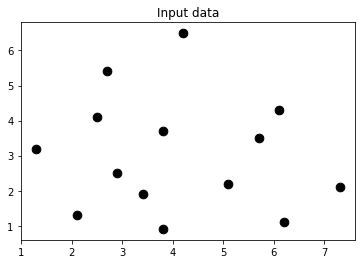

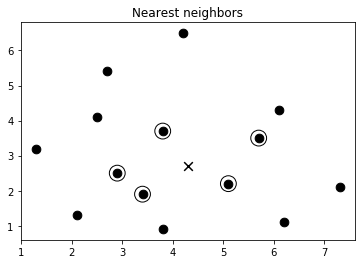

In [85]:
# Extracting the nearest neighbour
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Input data
X = np.array([[2.1, 1.3], [1.3,3.2], [2.9,2.5],[2.7,5.4], [3.8,0.9],[7.3,2.1], [4.2,6.5], [3.8,3.7], [2.5,4.1], [3.4, 1.9], [5.7,3.5], [6.1,4.3], [5.1,2.2], [6.2,1.1]])

# Nmber of nearest neighbors
k = 5

# Test datapoints
test_datapoint = [[4.3, 2.7]]

# Plot input data
plt.figure()
plt.title('Input data')
plt.scatter(X[:,0], X[:,1], marker = 'o', s = 75,color = 'black')

# Build K Nearest Neighbor model
knn_model = NearestNeighbors(n_neighbors = k, algorithm = 'ball_tree').fit(X)
distances, indices = knn_model.kneighbors(test_datapoint)
print ("\n indices = ", indices)

# Print the 'k' nearest neighbors
print("\n K neaerest Neighbors:")
for rank, index in enumerate(indices[0][:k], start = 1):
    print(str(rank) + " ==> ", X[index])
    
# Visualize the neaerest neighbors
plt.figure()
plt.title('Nearest neighbors')
plt.scatter(X[:,0], X[:,1], marker = 'o', s = 75, color = 'k')
plt.scatter(X[indices][0][:][:,0], X[indices][0][:][:,1], marker = 'o', s = 250, color = 'k', facecolors = 'none')
# print("\n X[indices] = ", X[indices]) 
# print("\n X[indices] = ", X[indices][0][:][:,1]) # Since X[indices] = [[[5.1 2.2], [...], ...]], then X[indices][0][:][:,0]= [5.1, ...] and X[indices][0][:][:,1] = [2.2, ...] 
plt.scatter(test_datapoint[0][0], test_datapoint[0][1],marker = 'x', s = 75, color = 'k')
#plt.show


Predicted Output:  1


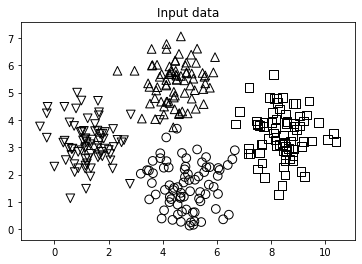

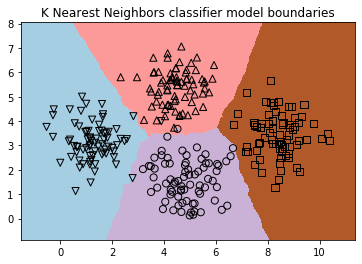

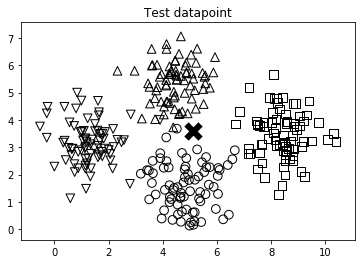

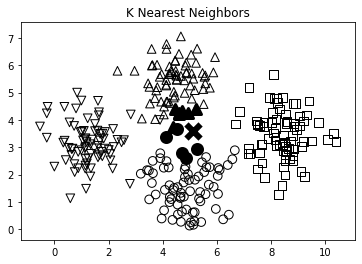

In [134]:
# Building a K-Nearest Neighbors classifier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

# Load data
input_file = open('C:/Users/Peyman/Desktop/Python - Practices/data.txt', 'r')
data = np.loadtxt(input_file, delimiter = ',')
X, y  = data[:,:-1], data[:, -1].astype(np.int) # astype(np.int) to make sure the class lables are integer numbers

# plot input data
plt.figure
plt.title('Input data')
marker_shapes = 'v^os'
mapper = [marker_shapes[i] for i in y] # each column of the input is assigned to an individual marker
for i in range(X.shape[0]):
    plt.scatter(X[i, 0], X[i, 1], marker = mapper[i], s = 75, edgecolors = 'black', facecolors = 'none')
    
# number of nearest neighbors
num_neighbors = 12

# step size of the visualization grid
step_size = 0.01

# Create a 'K Nearest Neighbors' classifier model
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights = 'distance')

# Trian the model
classifier.fit(X,y)

# Create mesh to plot the boundaries
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

# Evaluate the classifier on the points on the grid
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

# Create a clolor mesh to visualize the output

output = output.reshape(x_values.shape)
plt.figure()
plt.pcolormesh(x_values, y_values, output, cmap = cm.Paired)

# Overlay the raining points on the map
for i in range(X.shape[0]):  # 'shape' attribute in numpy = 'size' in Matlab
    plt.scatter(X[i,0], X[i,1], marker = mapper[i], s = 50 , edgecolors = 'black', facecolors = 'none')
    
# Set the X and Y limits and title
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('K Nearest Neighbors classifier model boundaries')

# Test the performance of the calssifier by inputing a new point
test_datapoint = [5.1, 3.6]
plt.figure()
plt.title('Test datapoint')
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker = mapper[i], s=75, edgecolors = 'black', facecolors = 'none')

plt.scatter(test_datapoint[0], test_datapoint[1], marker = 'x', linewidth = 6, s = 200, facecolors = 'black')

# Extract the K nearest neighbors baed on the classifier
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]

# plot k nearest neighbors
plt.figure()
plt.title('K Nearest Neighbors')

for i in indices:
    plt.scatter(X[i,0], X[i,1], marker = mapper[y[i]], linewidth = 3, s = 100, facecolors = 'black')
    
# overlay test point
plt.scatter(test_datapoint[0], test_datapoint[1], marker = 'x', linewidth = 6, s=200, facecolors = 'black')

# Overlay the input data
for i in range(X.shape[0]):  # X.shape[0] = number of columns
    plt.scatter(X[i,0], X[i,1], marker = mapper[i], s=75, edgecolors = 'black', facecolors = 'none')
    
print("Predicted Output: ", classifier.predict([test_datapoint])[0])

    
    

In [131]:
# Shape attribute
# The shape attribute for numpy arrays returns the dimensions of the array.
a = [[1,2], [2,3], [3,4]]
print(np.shape(a))
np.shape(a[2])

(3, 2)


(2,)

In [206]:
# This program is saved as 'compute_scores' in the 'Python - Practices' folder. Nodepad++ was used to save the code as .py
# to run this program 1) open the Anocanda Terminal 2) change the directory to 'Python - Practices' folder 3) excute one of the following codes
# python compute_scores.py --user1 "David Smith" --user2 "Bill Duffy" --score_type Euclidean 
# python compute_scores.py --user1 "David Smith" --user2 "Bill Duffy" --score_type Pearson



# Computing similarity scores
import argparse
import json
import numpy as np

# Create a function that get two users and type of score, then it computes the similarity score
def build_arg_parser():
    parser = argparse.ArgumentParser(description = 'Compute similarity score')
    parser.add_argument('--user1', dest = 'user1', required = True, help = 'First user')
    parser.add_argument('--user2', dest = 'user2', required = True, help = 'Second user')
    parser.add_argument('--score_type', dest = 'score_type', required = True, choices = ['Euclidean', 'Pearson'], help = 'Similarity metric to be used')
    return parser

# Define a fun to compute the Euclidean distance score bw. two users

def euclidean_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')
        
    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')
    
    # Define a variable to track the movies rated by both users
    common_movies ={}
    
    # Extract the movies that rated by both users
    
    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1
    
    # If there no common movies be users, then the score is zero
    if len(common_movies) == 0:
        return 0
    
    # Compute the squared differences bw the ratings
    squared_diff = []
    for item in dataset[user1]:
        if item in dataset[user2]:
            squared_diff.append(np.square(dataset[user1][item] - dataset[user2][item]))
    return 1/(1+np.sqrt(np.sum(squared_diff)))

# Define a func to compute the Pearson correlation score bw users.
def pearson_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')
        
    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')
        
    # Define a variable to track the movies rated by both users
    common_movies ={}
    
    # Extract the movies that rated by both users
    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1
            
    # No common movies, no similar score; i.e., similar-score = 0
    num_ratings = len(common_movies)
    # If there are no common movies bw. user1 and user 2, then the score is zero
    if num_ratings == 0:
        return 0
    
    # calculate the sum of ratings of all the common movies 
    user1_sum = np.sum([dataset[user1][item] for item in common_movies])
    user2_sum = np.sum([dataset[user2][item] for item in common_movies])
    
    # Calculate the sum of squares of ratings of all the common movies
    user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in common_movies])
    user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in common_movies])
    
    # Calculate the sum of products of the ratings of the common movies 
    sum_of_products = np.sum([dataset[user1][item]* dataset[user2][item] for item in common_movies])
    
    # Calcualate the Pearson correlation score
    Sxy = sum_of_products - (user1_sum *user2_sum / num_ratings)
    Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
    Syy = user2_squared_sum - np.square(user2_sum) / num_ratings
    
    # If no deviation, the score is zero
    if Sxx*Syy == 0:
        return 0
    
    return Sxy / np.sqrt(Sxx*Syy)
    
# Define the main function and parse the input arguments
if __name__ == '__main__':
    parser = build_arg_parser()
    args = parser.parse_args()
    user1 = args.user1
    user2 = args.user2
    score_type = args.score_type

    # load the raings from the fle rating.jason into a dictionary
    ratings_file = 'C:/Users/Peyman/Desktop/Python - Practices/ratings.json'
    with open(ratings_file, 'r') as f:
        data = json.loads(f.read())

    if score_type == "Euclidean":
        print("\n Euclidean score:")
        print(euclidean_score(data, user1, user2))
    else:
        print("\n Pearson score:")
        print(pearson_score(data, user1, user2))


usage: ipykernel_launcher.py [-h] --user1 USER1 --user2 USER2 --score_type
                             {Euclidean,Pearson}
ipykernel_launcher.py: error: the following arguments are required: --user1, --user2, --score_type


SystemExit: 2

In [180]:
#import compute_scores.py
  compute_scores.py --user1 "David Smith" --user2 "Bill Duffy" --score-type Eucidean

UsageError: Line magic function `%` not found.


In [192]:
%%cmd
compute_scores.py --user1 "david Smith" --user2 "Bill Duffy" --score-type Eucidean

Microsoft Windows [Version 10.0.17763.973]
(c) 2018 Microsoft Corporation. All rights reserved.

C:\Users\Peyman\AI>import compute_scores

C:\Users\Peyman\AI>compute_scores.py --user1 "david Smith" --user2 "Bill Duffy" --score-type Eucidean

C:\Users\Peyman\AI>

'import' is not recognized as an internal or external command,
operable program or batch file.
'compute_scores.py' is not recognized as an internal or external command,
operable program or batch file.


In [208]:
# Finding similar users using collaborative filtering
# Collaborative Filtering

# This program is saved as 'collaborative_filtering.py' in the 'Python - Practices folder' using Notepad++
# to run this program 1) open the Anocanda Terminal 2) change the directory to 'Python - Practices' folder 3) excute one of the following codes
# python collaborative_filtering.py --user "Bill Duffy"
# python collaborative_filtering.py --user "Clarissa Jackson"

import argparse
import json
import numpy as np

# Define a func to compute the Pearson correlation score bw users.
def pearson_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')
        
    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')
        
    # Define a variable to track the movies rated by both users
    common_movies ={}
    
    # Extract the movies that rated by both users
    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1
            
    # No common movies, no similar score; i.e., similar-score = 0
    num_ratings = len(common_movies)
    # If there are no common movies bw. user1 and user 2, then the score is zero
    if num_ratings == 0:
        return 0
    
    # calculate the sum of ratings of all the common movies 
    user1_sum = np.sum([dataset[user1][item] for item in common_movies])
    user2_sum = np.sum([dataset[user2][item] for item in common_movies])
    
    # Calculate the sum of squares of ratings of all the common movies
    user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in common_movies])
    user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in common_movies])
    
    # Calculate the sum of products of the ratings of the common movies 
    sum_of_products = np.sum([dataset[user1][item]* dataset[user2][item] for item in common_movies])
    
    # Calcualate the Pearson correlation score
    Sxy = sum_of_products - (user1_sum *user2_sum / num_ratings)
    Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
    Syy = user2_squared_sum - np.square(user2_sum) / num_ratings
    
    # If no deviation, the score is zero
    if Sxx*Syy == 0:
        return 0
    
    return Sxy / np.sqrt(Sxx*Syy)
    

# Define function to parse input arguments
def build_arg_parser():
    parser = argparse.ArgumentParser(description = 'Find user who are similar to the input user')
    parser.add_argument('--user', dest = 'user', required = True, help = 'Input user')
    return parser


# Find users in the dataset that are similar to input user, or raise error if the user is not dataset
def find_similar_users(dataset, user, num_users):
    if user not in dataset:
        raise TypeError('Cannot find' + user + ' in the dataset')
        
    # Compute Pearson score bw. input user and all the users in the dataset
    scores = np.array([[x, pearson_score(dataset, user, x)] for x in dataset if x != user])
    
    # Sort the scores in decreasing order 
    scores_sorted = np.argsort(scores[:,1])[::-1]
    
    # Extract the top 'num_users' scores
    top_users = scores_sorted[:num_users]
    return scores[top_users]

# Define the main function
if __name__=='__main__':
    args = build_arg_parser().parse_args()
    user = args.user
    
    # Load the data from a movie rating file of ratings.json
    ratings_file = 'ratings.json'
    with open(ratings_file, 'r') as f:
        data = json.loads(f.read())
        
    # Find the the three users who are similar to the user specified
    print('\n Users similar to'+ user + ':\n')
    similar_users = find_similar_users(data, user, 3)
    print('User\t\t\tSimilarity score')
    print('-'*40)
    for item in similar_users:
        print(item[0], '\t\t', round(float(item[1]),2))
    
    


usage: ipykernel_launcher.py [-h] --user USER
ipykernel_launcher.py: error: the following arguments are required: --user


SystemExit: 2

In [212]:
# Building a movie recommendation system

# This program is saved as 'movie_recommender.py' in the 'Python - Practices folder' using Notepad++
# To run this program 1) open the Anocanda Terminal 2) change the directory to 'Python - Practices' folder 3) excute one of the following codes
# python movie_recommender.py --user "Chris Duncan"
# python movie_recommender.py --user "Julie Hammel"


import argparse
import json
import numpy as np

#from compute_scores import pearson_score
# Define a func to compute the Pearson correlation score bw users.
def pearson_score(dataset, user1, user2):
    if user1 not in dataset:
        raise TypeError('Cannot find ' + user1 + ' in the dataset')
        
    if user2 not in dataset:
        raise TypeError('Cannot find ' + user2 + ' in the dataset')
        
    # Define a variable to track the movies rated by both users
    common_movies ={}
    
    # Extract the movies that rated by both users
    for item in dataset[user1]:
        if item in dataset[user2]:
            common_movies[item] = 1
            
    # No common movies, no similar score; i.e., similar-score = 0
    num_ratings = len(common_movies)
    # If there are no common movies bw. user1 and user 2, then the score is zero
    if num_ratings == 0:
        return 0
    
    # calculate the sum of ratings of all the common movies 
    user1_sum = np.sum([dataset[user1][item] for item in common_movies])
    user2_sum = np.sum([dataset[user2][item] for item in common_movies])
    
    # Calculate the sum of squares of ratings of all the common movies
    user1_squared_sum = np.sum([np.square(dataset[user1][item]) for item in common_movies])
    user2_squared_sum = np.sum([np.square(dataset[user2][item]) for item in common_movies])
    
    # Calculate the sum of products of the ratings of the common movies 
    sum_of_products = np.sum([dataset[user1][item]* dataset[user2][item] for item in common_movies])
    
    # Calcualate the Pearson correlation score
    Sxy = sum_of_products - (user1_sum *user2_sum / num_ratings)
    Sxx = user1_squared_sum - np.square(user1_sum) / num_ratings
    Syy = user2_squared_sum - np.square(user2_sum) / num_ratings
    
    # If no deviation, the score is zero
    if Sxx*Syy == 0:
        return 0
    
    return Sxy / np.sqrt(Sxx*Syy)
    

# from collaborative_filtering import find_similar users
# Find users in the dataset that are similar to input user, or raise error if the user is not dataset
def find_similar_users(dataset, user, num_users):
    if user not in dataset:
        raise TypeError('Cannot find' + user + ' in the dataset')
        
    # Compute Pearson score bw. input user and all the users in the dataset
    scores = np.array([[x, pearson_score(dataset, user, x)] for x in dataset if x != user])
    
    # Sort the scores in decreasing order 
    scores_sorted = np.argsort(scores[:,1])[::-1]
    
    # Extract the top 'num_users' scores
    top_users = scores_sorted[:num_users]
    return scores[top_users]


# Define a function to parse the input arguments; the only input is the name of the user
def build_arg_parser():
    parser = argparse.ArgumentParser(description = 'Find the movie recommendations for the given user')
    parser.add_argument('--user', dest = 'user', required = True, help = 'Input user')
    return parser

# Get recommendation for input user
def get_recomendations(dataset, input_user):
    if input_user not in dataset:
        raise TypeError('Cannot find' + input_user + ' in the dataset. ')
        
    overall_scores = {}
    similarity_scores = {}
    
    # Compute the similarity score bw. the input user and all the other users in the dataset
    for user in [x for x in dataset if x != input_user]:
        similarity_score = pearson_score(dataset, input_user, user)
        
        if similarity_score <= 0:
            continue
        
    # Extract the movies that have been rated by the current user but haven't been rated by input user
        filtered_list = [x for x in dataset[user] if x not in dataset[input_user] or dataset[input_user][x] == 0]
    
        for item in filtered_list:
            overall_scores.update({item: dataset[user][item] * similarity_score})
            similarity_scores.update({item: similarity_score})
            
    # If there no such movies we cannot recommend anything
    if len(overall_scores) == 0:
        return ['No recommendations possible']
    
    # Normalize the scores based on the weighted scores
    # Generate movie ranks by normalization
    movie_scores = np.array([[score/similarity_scores[item], item] for item, score in overall_scores.items()])
    
    # Sort the scores and extract the movie recommendations
    # Sort in decreasing order
    movie_scores = movie_scores[np.argsort(movie_scores[:,0])[::-1]]
    
    # Extract the movie recommendations
    movie_recommendations = [movie for _, movie in movie_scores]
    
    return movie_recommendations
    
# Define the main func
if __name__ == '__main__':
    args = build_arg_parser().parse_args()
    user = args.user
    
    # Load the movie rating data from the file ratings.json
    ratings_file = 'ratings.json'
    
    with open(ratings_file, 'r') as f:
        data = json.loads(f.read())
        
    print("\n Movie recommendations for " + user + ":")
    movies = get_recomendations(data, user)
    for i, movie in enumerate(movies):
        print(str(i+1) + '.' + movie)
                                                        


usage: ipykernel_launcher.py [-h] --user USER
ipykernel_launcher.py: error: the following arguments are required: --user


SystemExit: 2